<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
data = pd.read_csv("salary_data.csv")
print("Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

Dataset loaded successfully!
Shape: (30, 2)

First 5 rows:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [ ]:
X = data["YearsExperience"].values
y = data["Salary"].values

X = (X - X.mean()) / X.std()

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
learning_rates = [0.001, 0.005, 0.01, 0.05]
epochs_list = [100, 300, 500, 1000]


In [ ]:
def gradient_descent(X, y, lr, epochs):
    m, b = 0, 0  # initial weights
    n = len(X)
    loss_history = []

    for epoch in range(epochs):
        y_pred = m * X + b
        error = y_pred - y
        loss = np.mean(error**2)
        loss_history.append(loss)

        # Gradients
        dm = (2/n) * np.dot(error, X)
        db = (2/n) * np.sum(error)

        # Update parameters
        m -= lr * dm
        b -= lr * db

        # Plot hypothesis every few epochs
        if epoch % (epochs // 4) == 0:
            plt.scatter(X, y, color='blue', label='Data' if epoch == 0 else "")
            plt.plot(X, y_pred, label=f'Epoch {epoch}', linewidth=2)

    plt.title("Hypothesis Function Progression")
    plt.xlabel("YearsExperience (normalized)")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()

    return m, b, loss_history


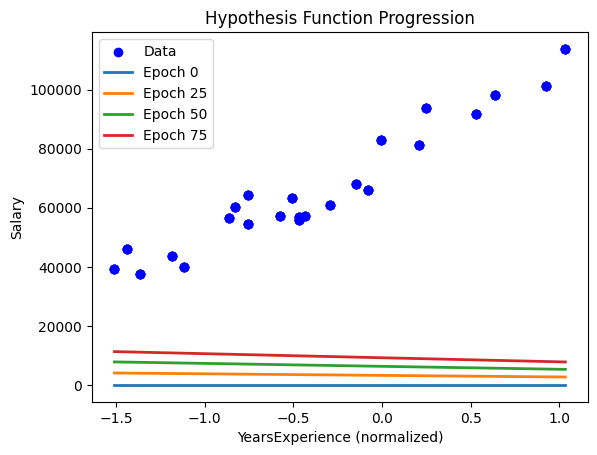

Learning Rate: 0.001, Epochs: 100, R²: -289.2415


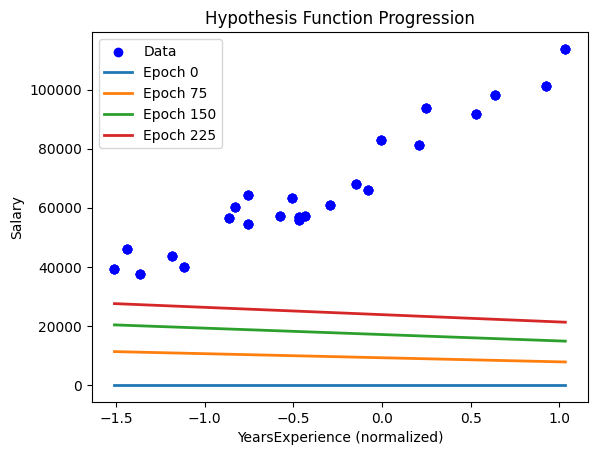

Learning Rate: 0.001, Epochs: 300, R²: -205.7335


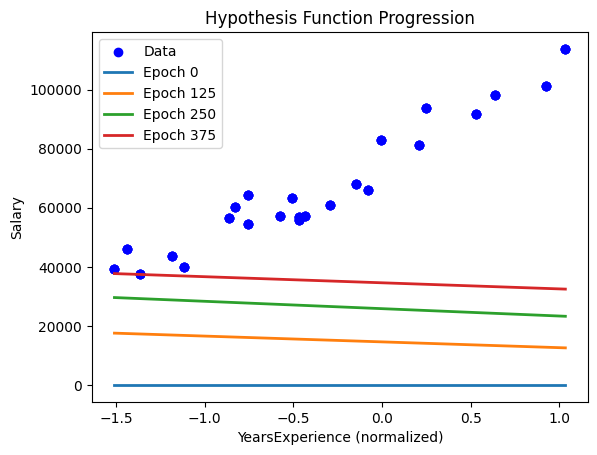

Learning Rate: 0.001, Epochs: 500, R²: -145.8521


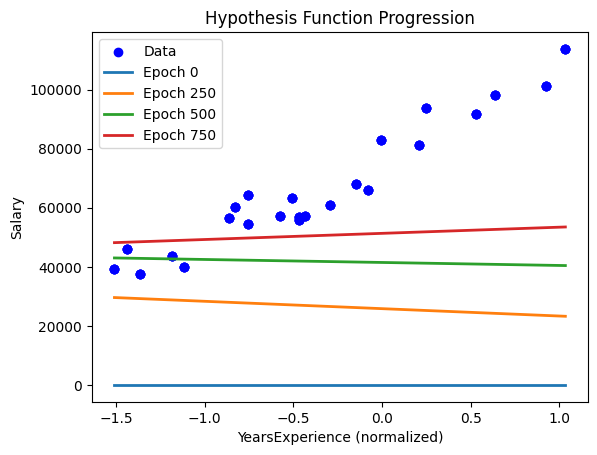

Learning Rate: 0.001, Epochs: 1000, R²: -60.3640


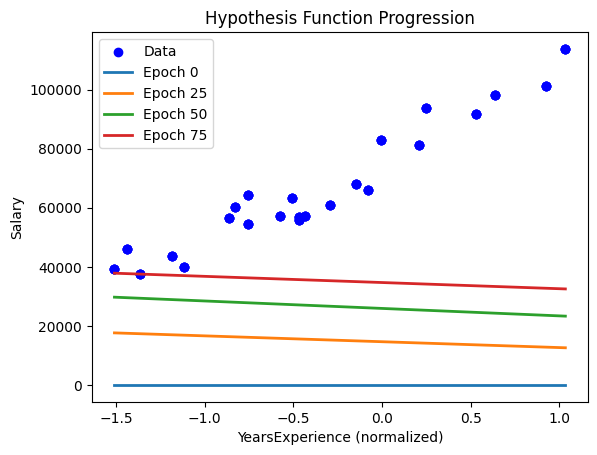

Learning Rate: 0.005, Epochs: 100, R²: -145.6487


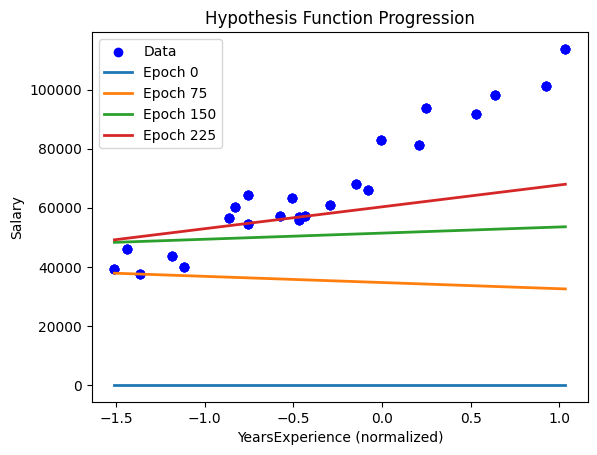

Learning Rate: 0.005, Epochs: 300, R²: -23.5783


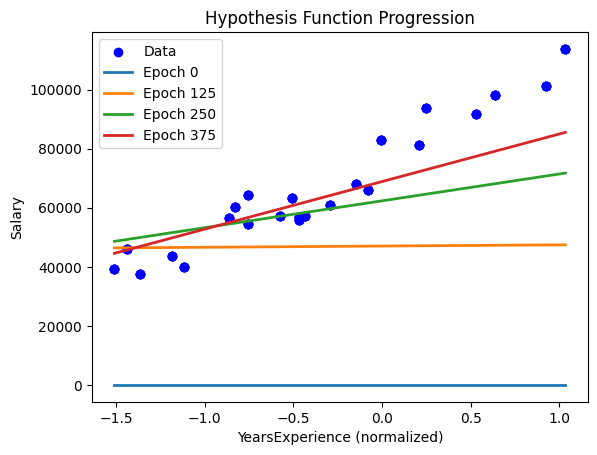

Learning Rate: 0.005, Epochs: 500, R²: -2.1714


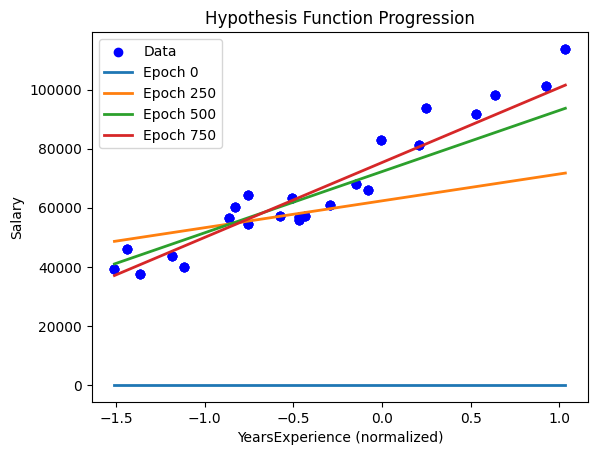

Learning Rate: 0.005, Epochs: 1000, R²: 0.5583


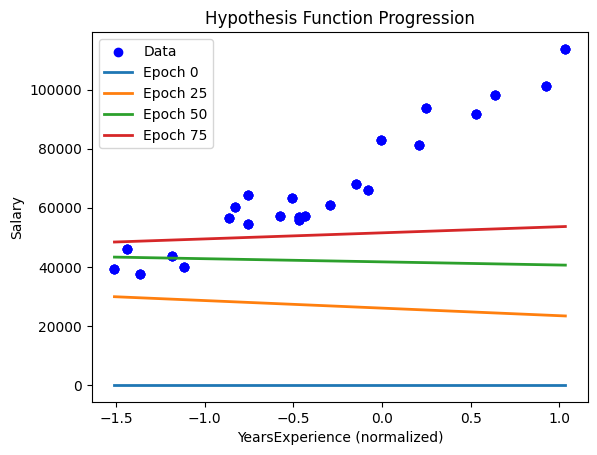

Learning Rate: 0.01, Epochs: 100, R²: -59.9696


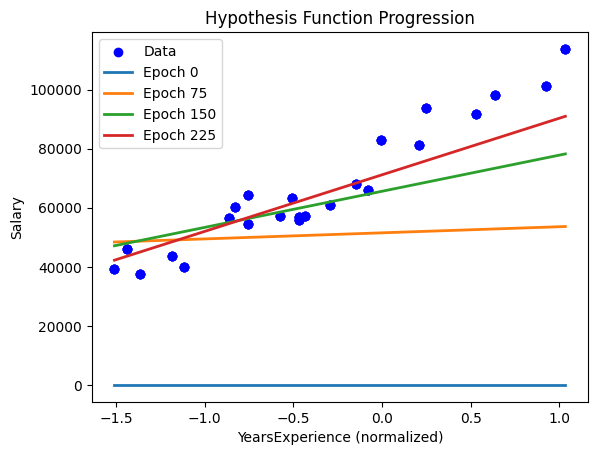

Learning Rate: 0.01, Epochs: 300, R²: 0.0856


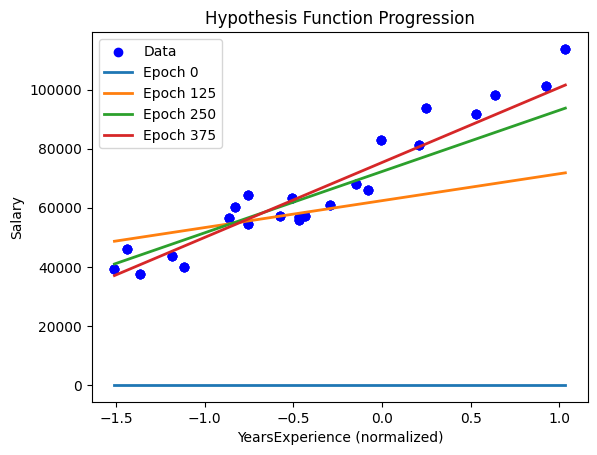

Learning Rate: 0.01, Epochs: 500, R²: 0.5553


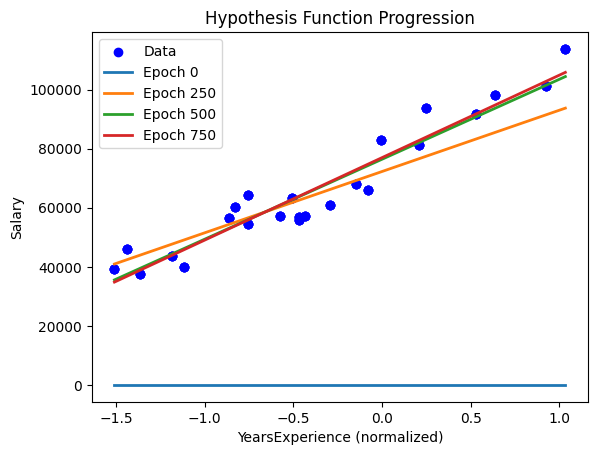

Learning Rate: 0.01, Epochs: 1000, R²: 0.0811


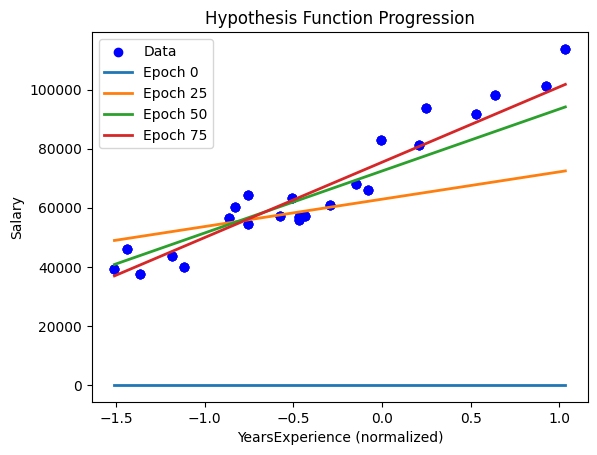

Learning Rate: 0.05, Epochs: 100, R²: 0.5314


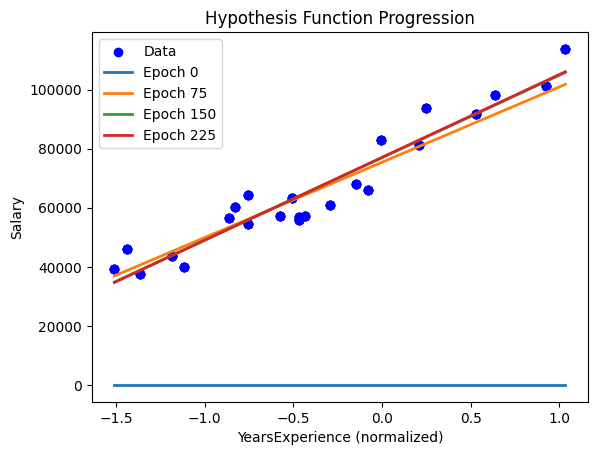

Learning Rate: 0.05, Epochs: 300, R²: 0.0704


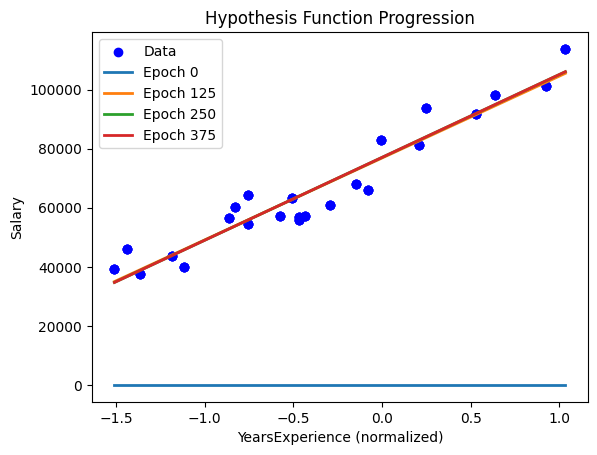

Learning Rate: 0.05, Epochs: 500, R²: 0.0703


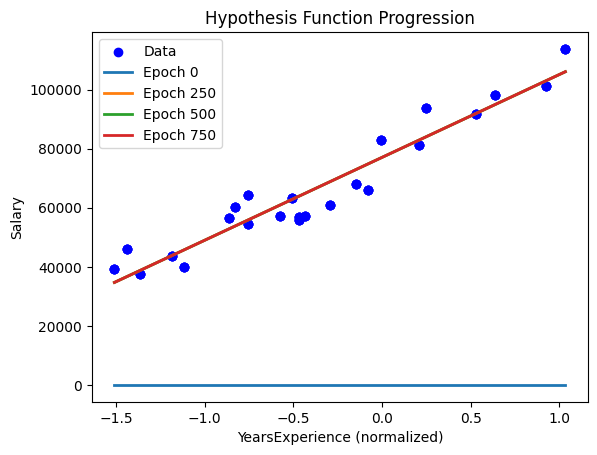

Learning Rate: 0.05, Epochs: 1000, R²: 0.0703


In [ ]:
best_r2 = -np.inf
best_params = {}

for lr in learning_rates:
    for ep in epochs_list:
        m, b, loss_hist = gradient_descent(X_train, y_train, lr, ep)
        y_pred = m * X_test + b
        r2 = r2_score(y_test, y_pred)

        print(f"Learning Rate: {lr}, Epochs: {ep}, R²: {r2:.4f}")
        if r2 > best_r2:
            best_r2 = r2
            best_params = {"lr": lr, "epochs": ep, "m": m, "b": b}

In [ ]:
print("\nBest Parameters:")
print(best_params)

y_pred_final = best_params["m"] * X_test + best_params["b"]

r2 = r2_score(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))


Best Parameters:
{'lr': 0.005, 'epochs': 1000, 'm': np.float64(27057.3592006839), 'b': np.float64(76437.95576833766)}



Final Model Performance:
R²: 0.5583
MAE: 3244.29
RMSE: 4122.36


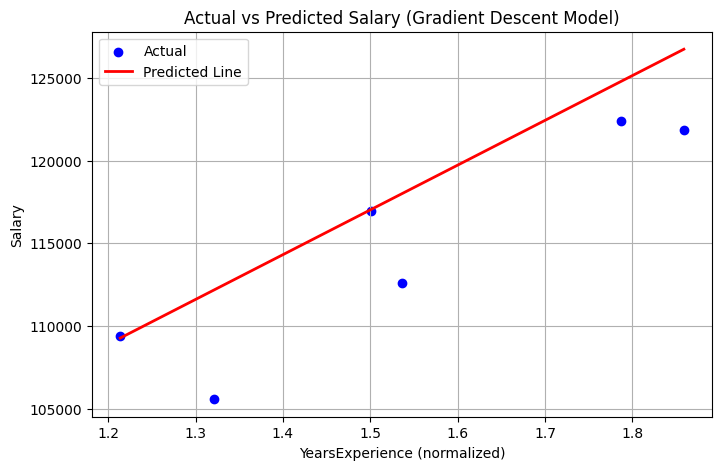

In [ ]:
print(f"\nFinal Model Performance:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Final plot
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_final, color='red', linewidth=2, label='Predicted Line')
plt.title("Actual vs Predicted Salary (Gradient Descent Model)")
plt.xlabel("YearsExperience (normalized)")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()